## Importing the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
#import scikit-learn as sci
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

In [2]:
sc.settings.verbosity = 3            
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
results_file = 'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/write/pbmc3k.h5ad'  

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.1 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 pynndescent==0.5.5


In [3]:
adata_ti = sc.read_h5ad(
   'C:/Users/Schlumi/Desktop/IIIBiophysik21-22/Organoids/garcia_alonso_cell_atlas/endometrium_all.h5ad')  # the directory with the `.mtx` file                # use gene symbols for the variable names (variables-axis )                              # write a cache file for faster subsequent reading
adata_ti.var_names_make_unique()

In [4]:
adata_ti_1 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387181",:] #tissue sample 1
adata_ti_2 = adata_ti[adata_ti.obs["SampleID"] == "4861STDY7387182",:] #tissue sample 2
adata_ti_3 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715415",:] #tissue sample 3
adata_ti_4 = adata_ti[adata_ti.obs["SampleID"] == "MRC_Endo8715416",:] #tissue sample 4

In [5]:
adata_ti_merged_12 = ad.concat([adata_ti_1,adata_ti_2], join="outer")

In [5]:
#adata_ti.var['mt'] = adata_ti.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
#sc.pp.calculate_qc_metrics(adata_ti, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#
#sc.pp.normalize_total(adata_ti, target_sum=1e4)
#
#sc.pp.log1p(adata_ti)
#
#sc.pp.highly_variable_genes(adata_ti, min_mean=0.0125, max_mean=3, min_disp=0.5)
#
#adata_ti = adata_ti[:, adata_ti.var.highly_variable]
#
#sc.pp.regress_out(adata_ti, ['total_counts', 'pct_counts_mt'])
#
#sc.pp.scale(adata_ti, max_value=10)

normalizing counts per cell
    finished (0:00:02)
extracting highly variable genes
    finished (0:00:09)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:09:16)


In [6]:
sc.pp.neighbors(adata_ti_merged_12, n_neighbors=10, n_pcs=30)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:50)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:07)


In [7]:
sc.tl.umap(adata_ti_merged_12)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


... storing 'SampleID' as categorical


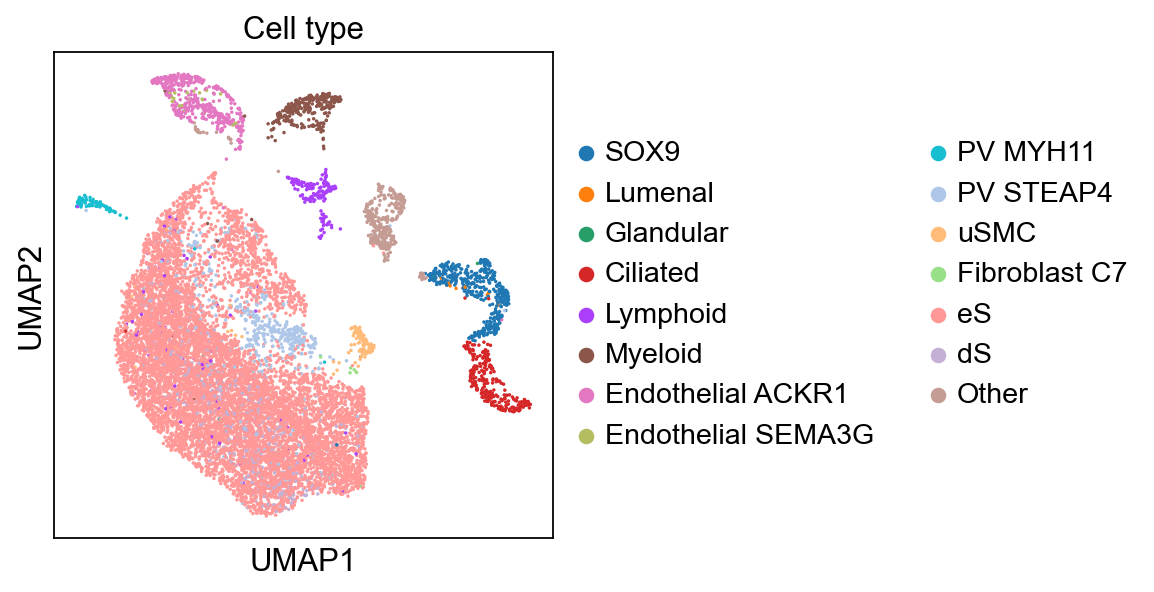

In [8]:
sc.pl.umap(adata_ti_merged_12, color="Cell type")

## Something else stuff

In [10]:
sc.tl.leiden(adata_ti_merged_12) #ln31

running Leiden clustering
    finished: found 20 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:03)


In [11]:
#print(adata_ti_merged_12.var_names)

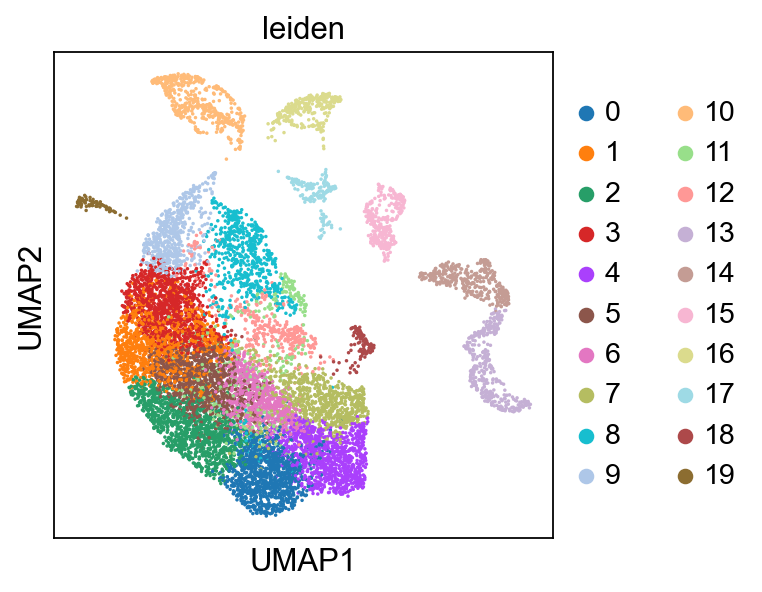

In [12]:
sc.pl.umap(adata_ti_merged_12, color=['leiden']) #ln32

In [16]:
new_cluster_names = [
    'eS1', 'eS2', 'eS3', 'eS4','eS5', 'eS6', 'eS7', 'eS8', 'eS9', 'eS10', 'Endothelial ACKR1', 'eS', 
    'PV STEAP4', 'Ciliated', 'SOX9', 'Other', 'Myeloid', 'Lymphoid', 'uSMC', 'PV MYH11']
adata_ti_merged_12.rename_categories('leiden', new_cluster_names)

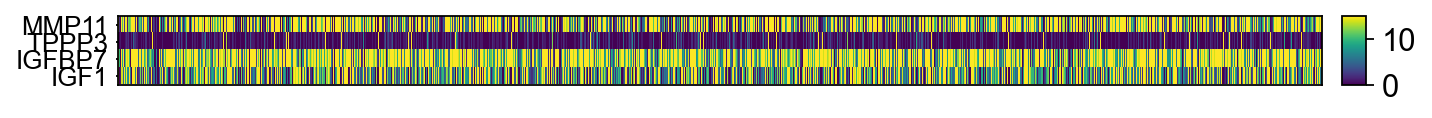

In [38]:
markers = ['MMP11', 'TPPP3', 'IGFBP7', 'IGF1']

#adata_ti_merged_12.obs['Stage'].cat.reorder_categories(['proliferative', 'early-secretory', 'early-mid-secretory', 'mid-secretory', 'late-secretory'], inplace = True)

sc.pl.heatmap(adata_ti_merged_12, markers, groupby='Stage', swap_axes=True, vmax=15, cmap='viridis')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:08)


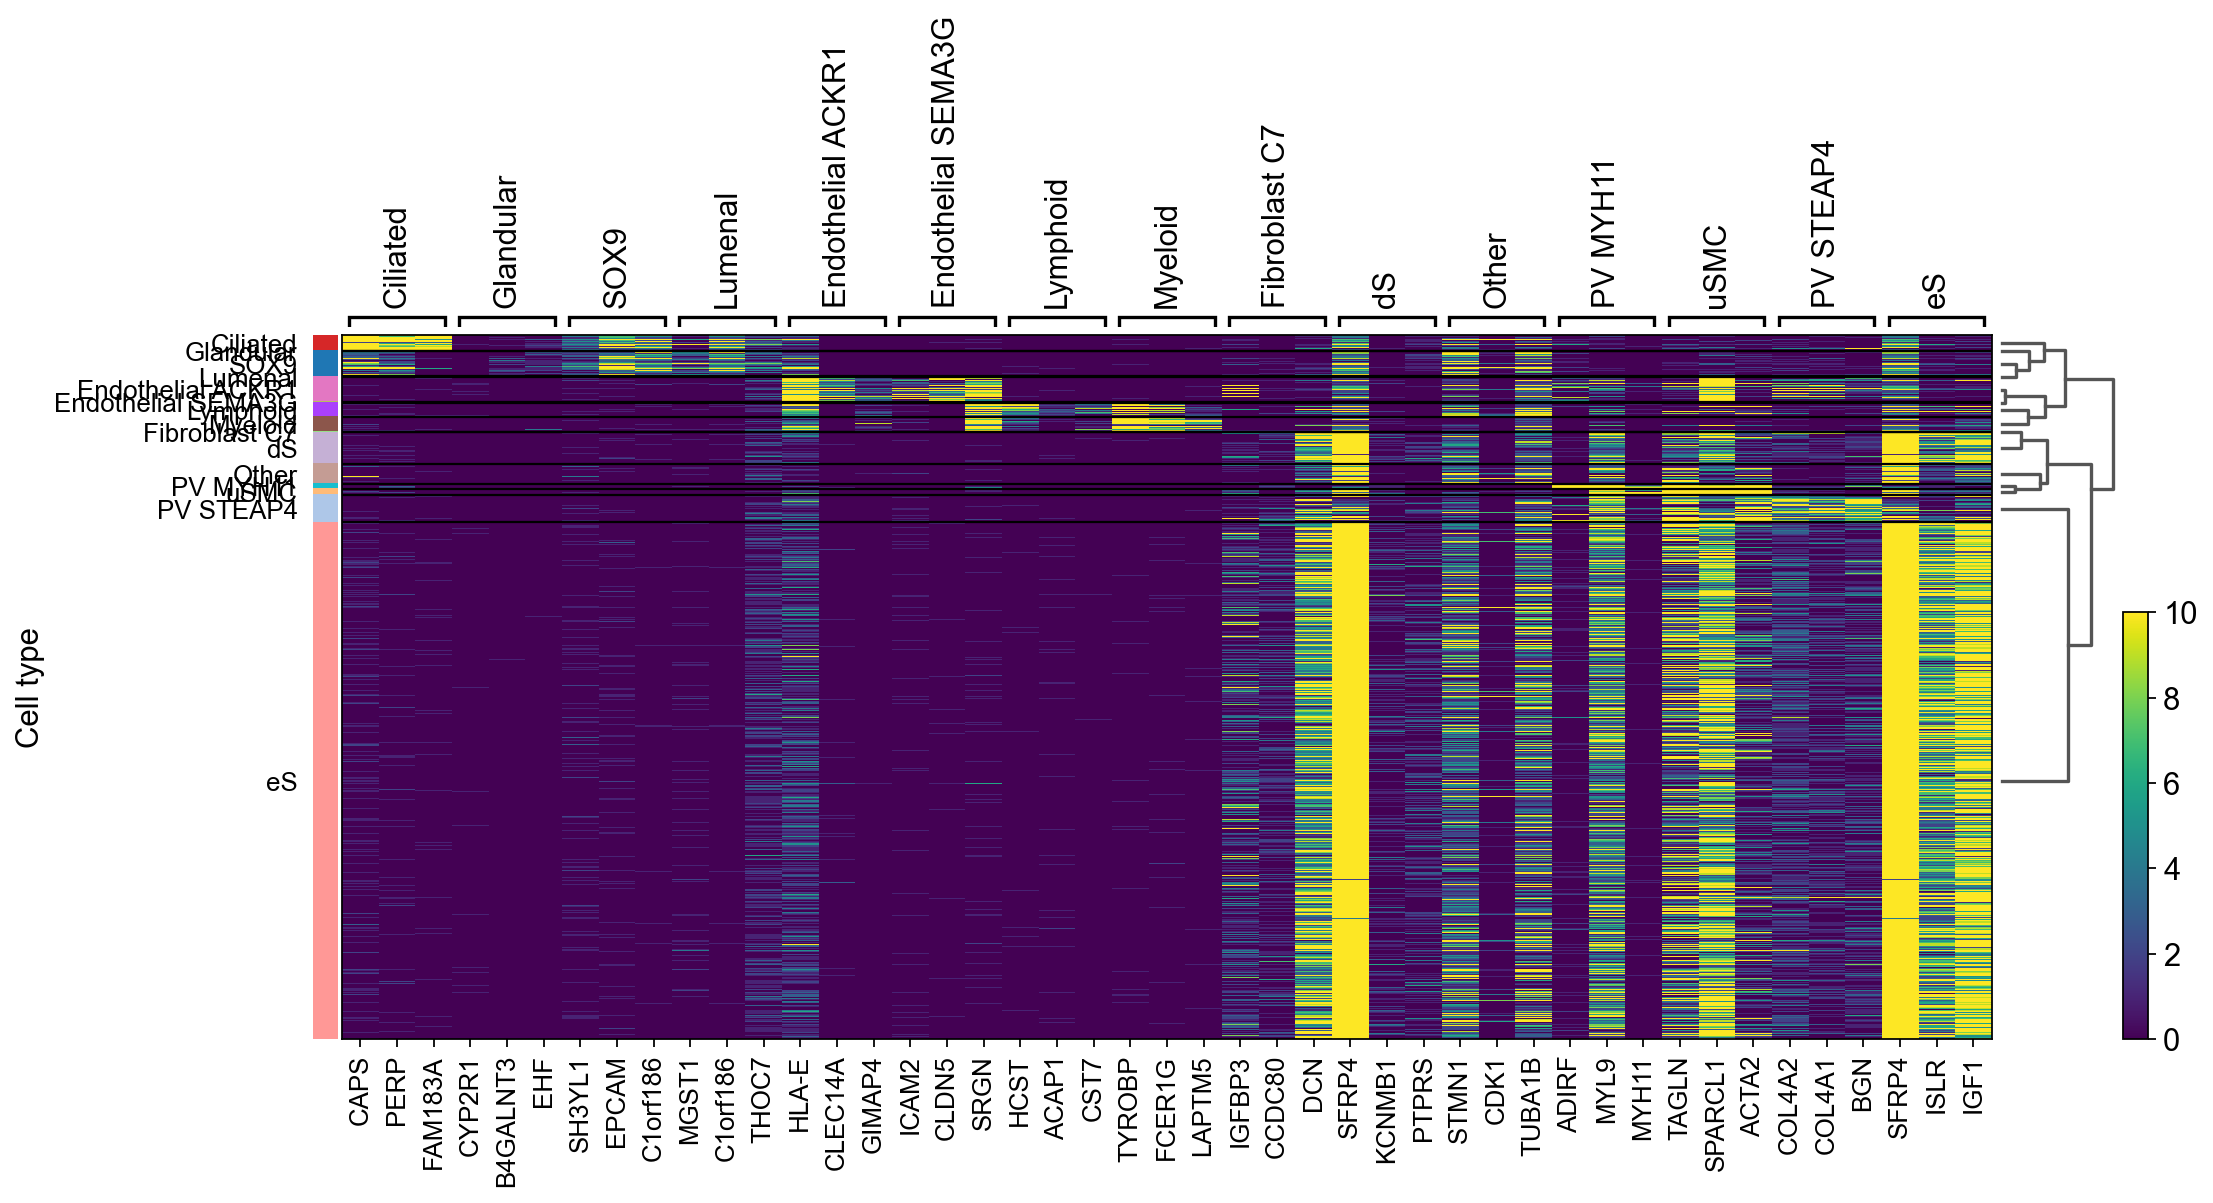

In [42]:
sc.tl.rank_genes_groups(adata_ti_merged_12, 'Cell type')
sc.pl.rank_genes_groups_heatmap(adata_ti_merged_12, n_genes=3, show_gene_labels=True, vmax=10)

In [ ]:
#adata.write(results_file) #ln33

## Annotating the cells

In [ ]:
adata_ref = sc.datasets.pbmc3k_processed()

In [ ]:
adata_ref.obs['SampleID']='pbmc3k'

print(adata_ref.shape)
adata_ref.obs

In [ ]:
sc.pl.umap(adata_ref, color='louvain')

## Finding marker genes

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


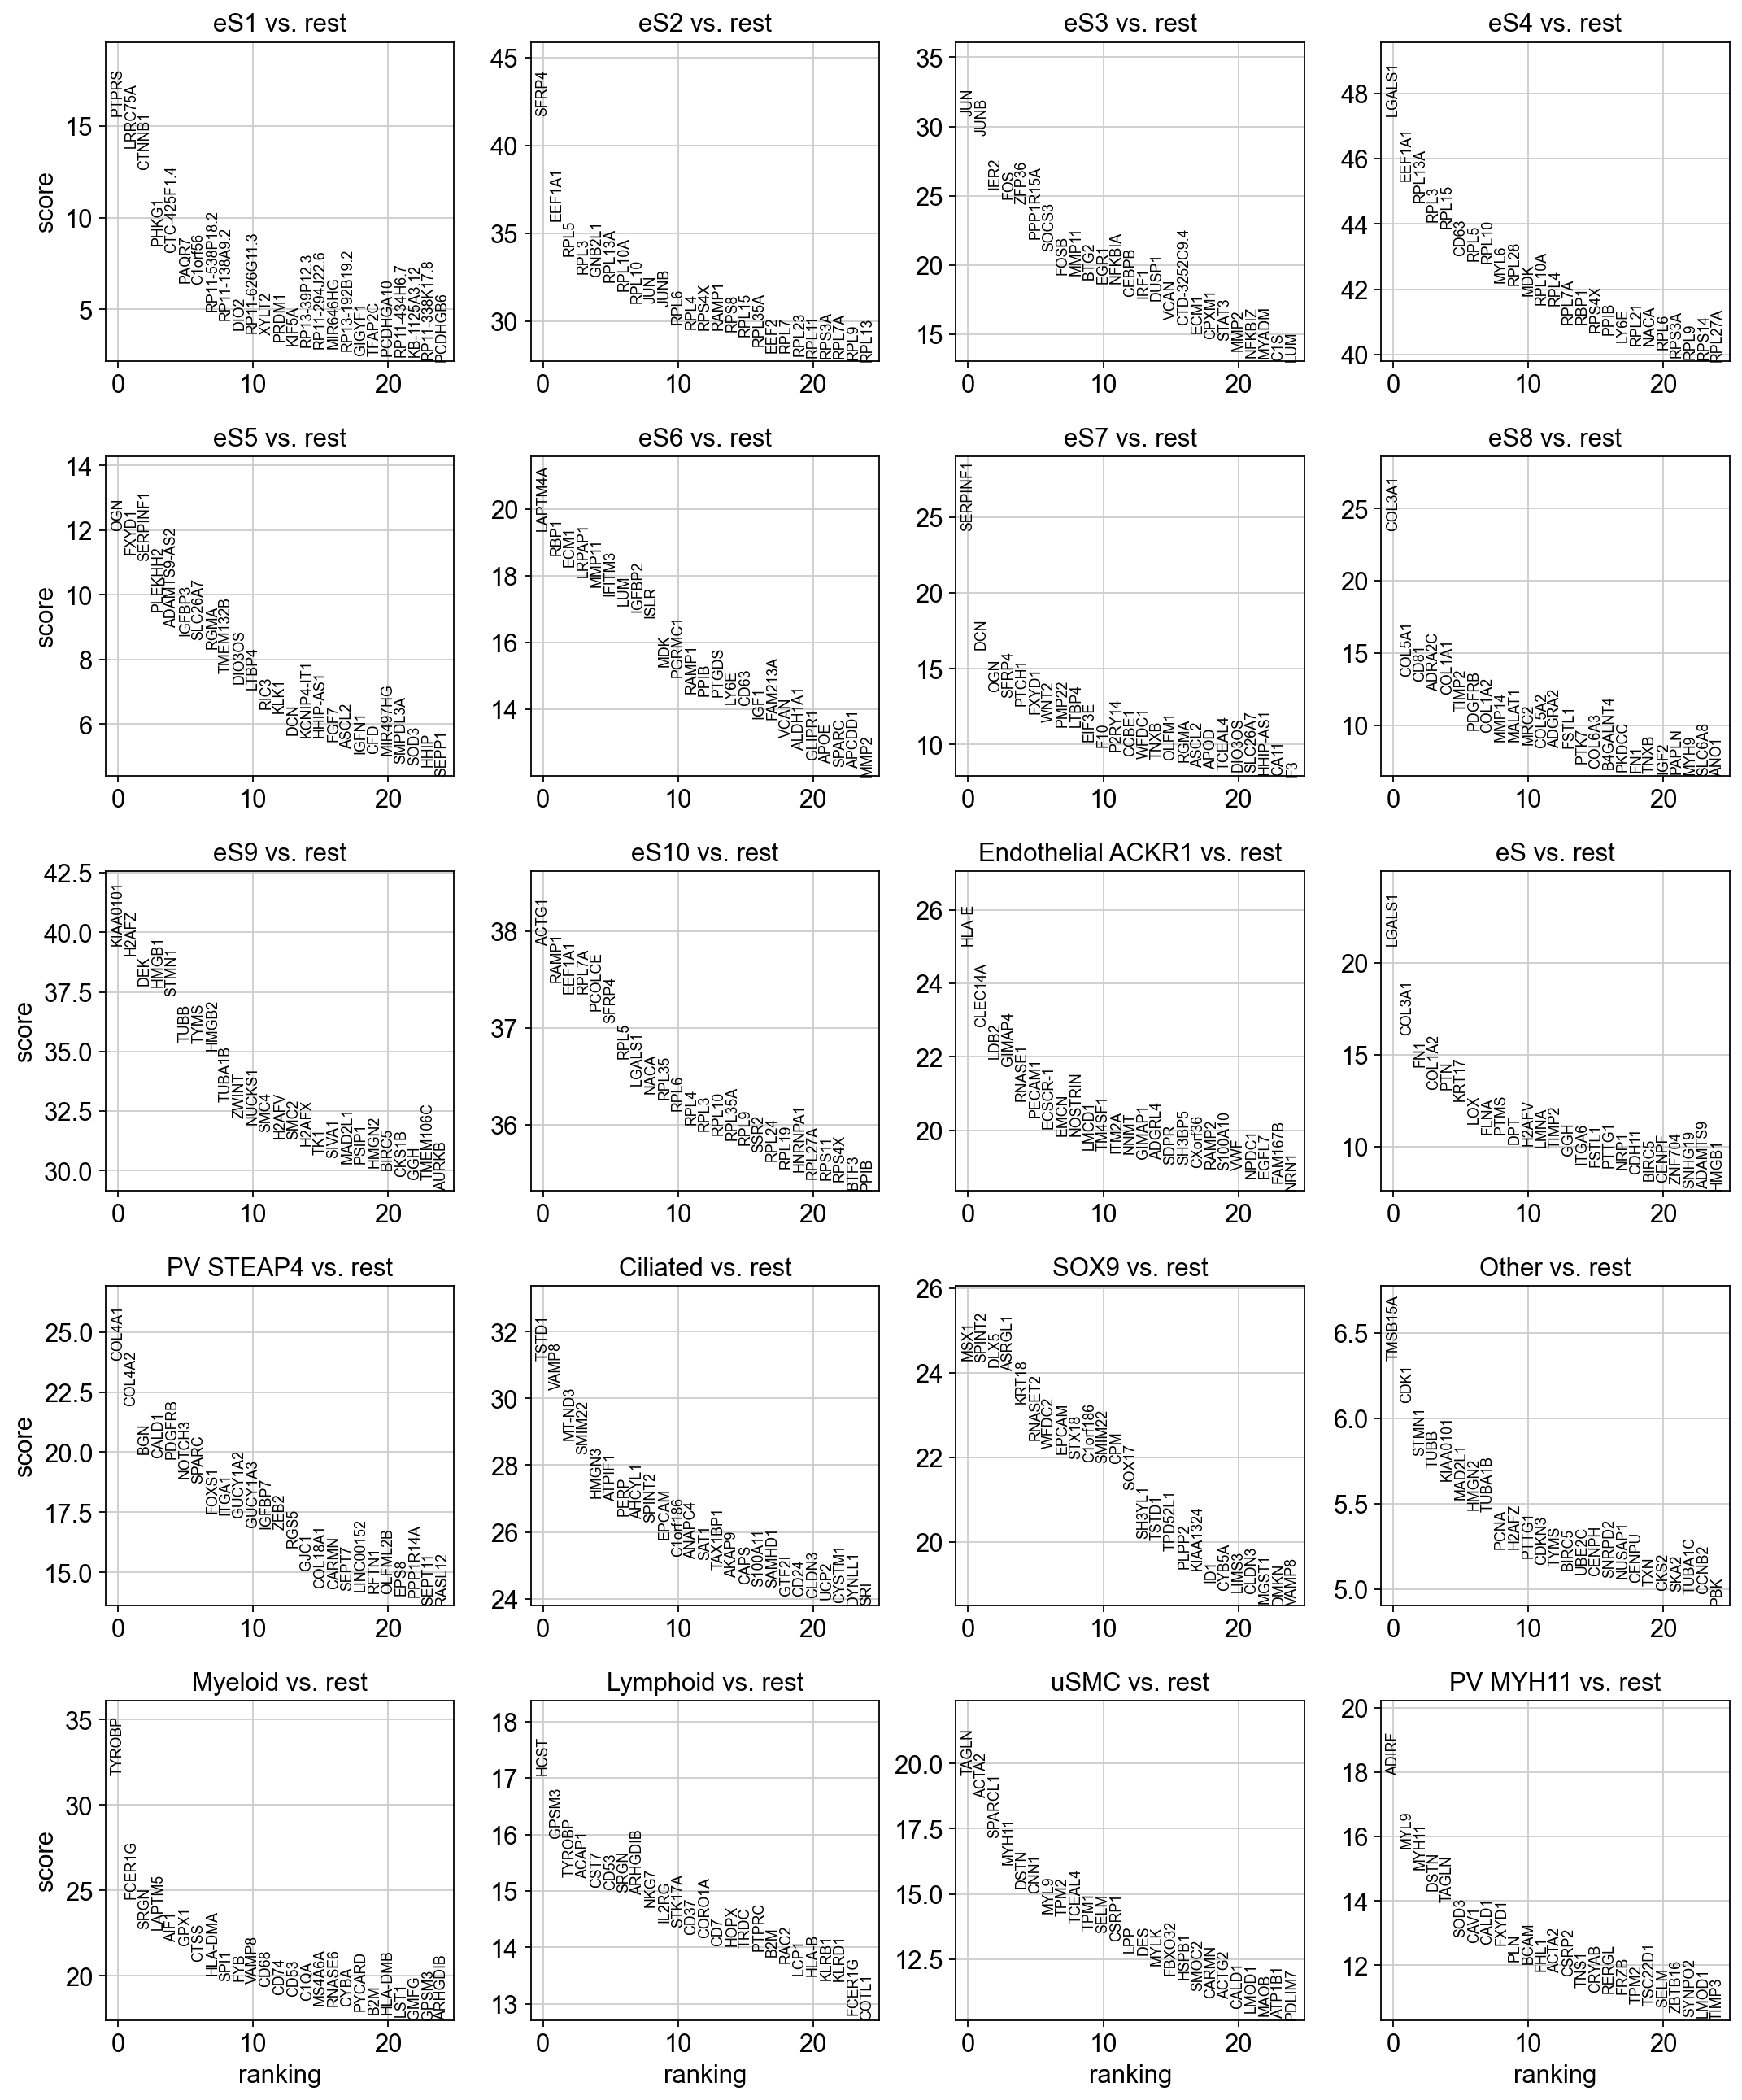

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\scanpy\tools\_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (


    finished (0:00:43)


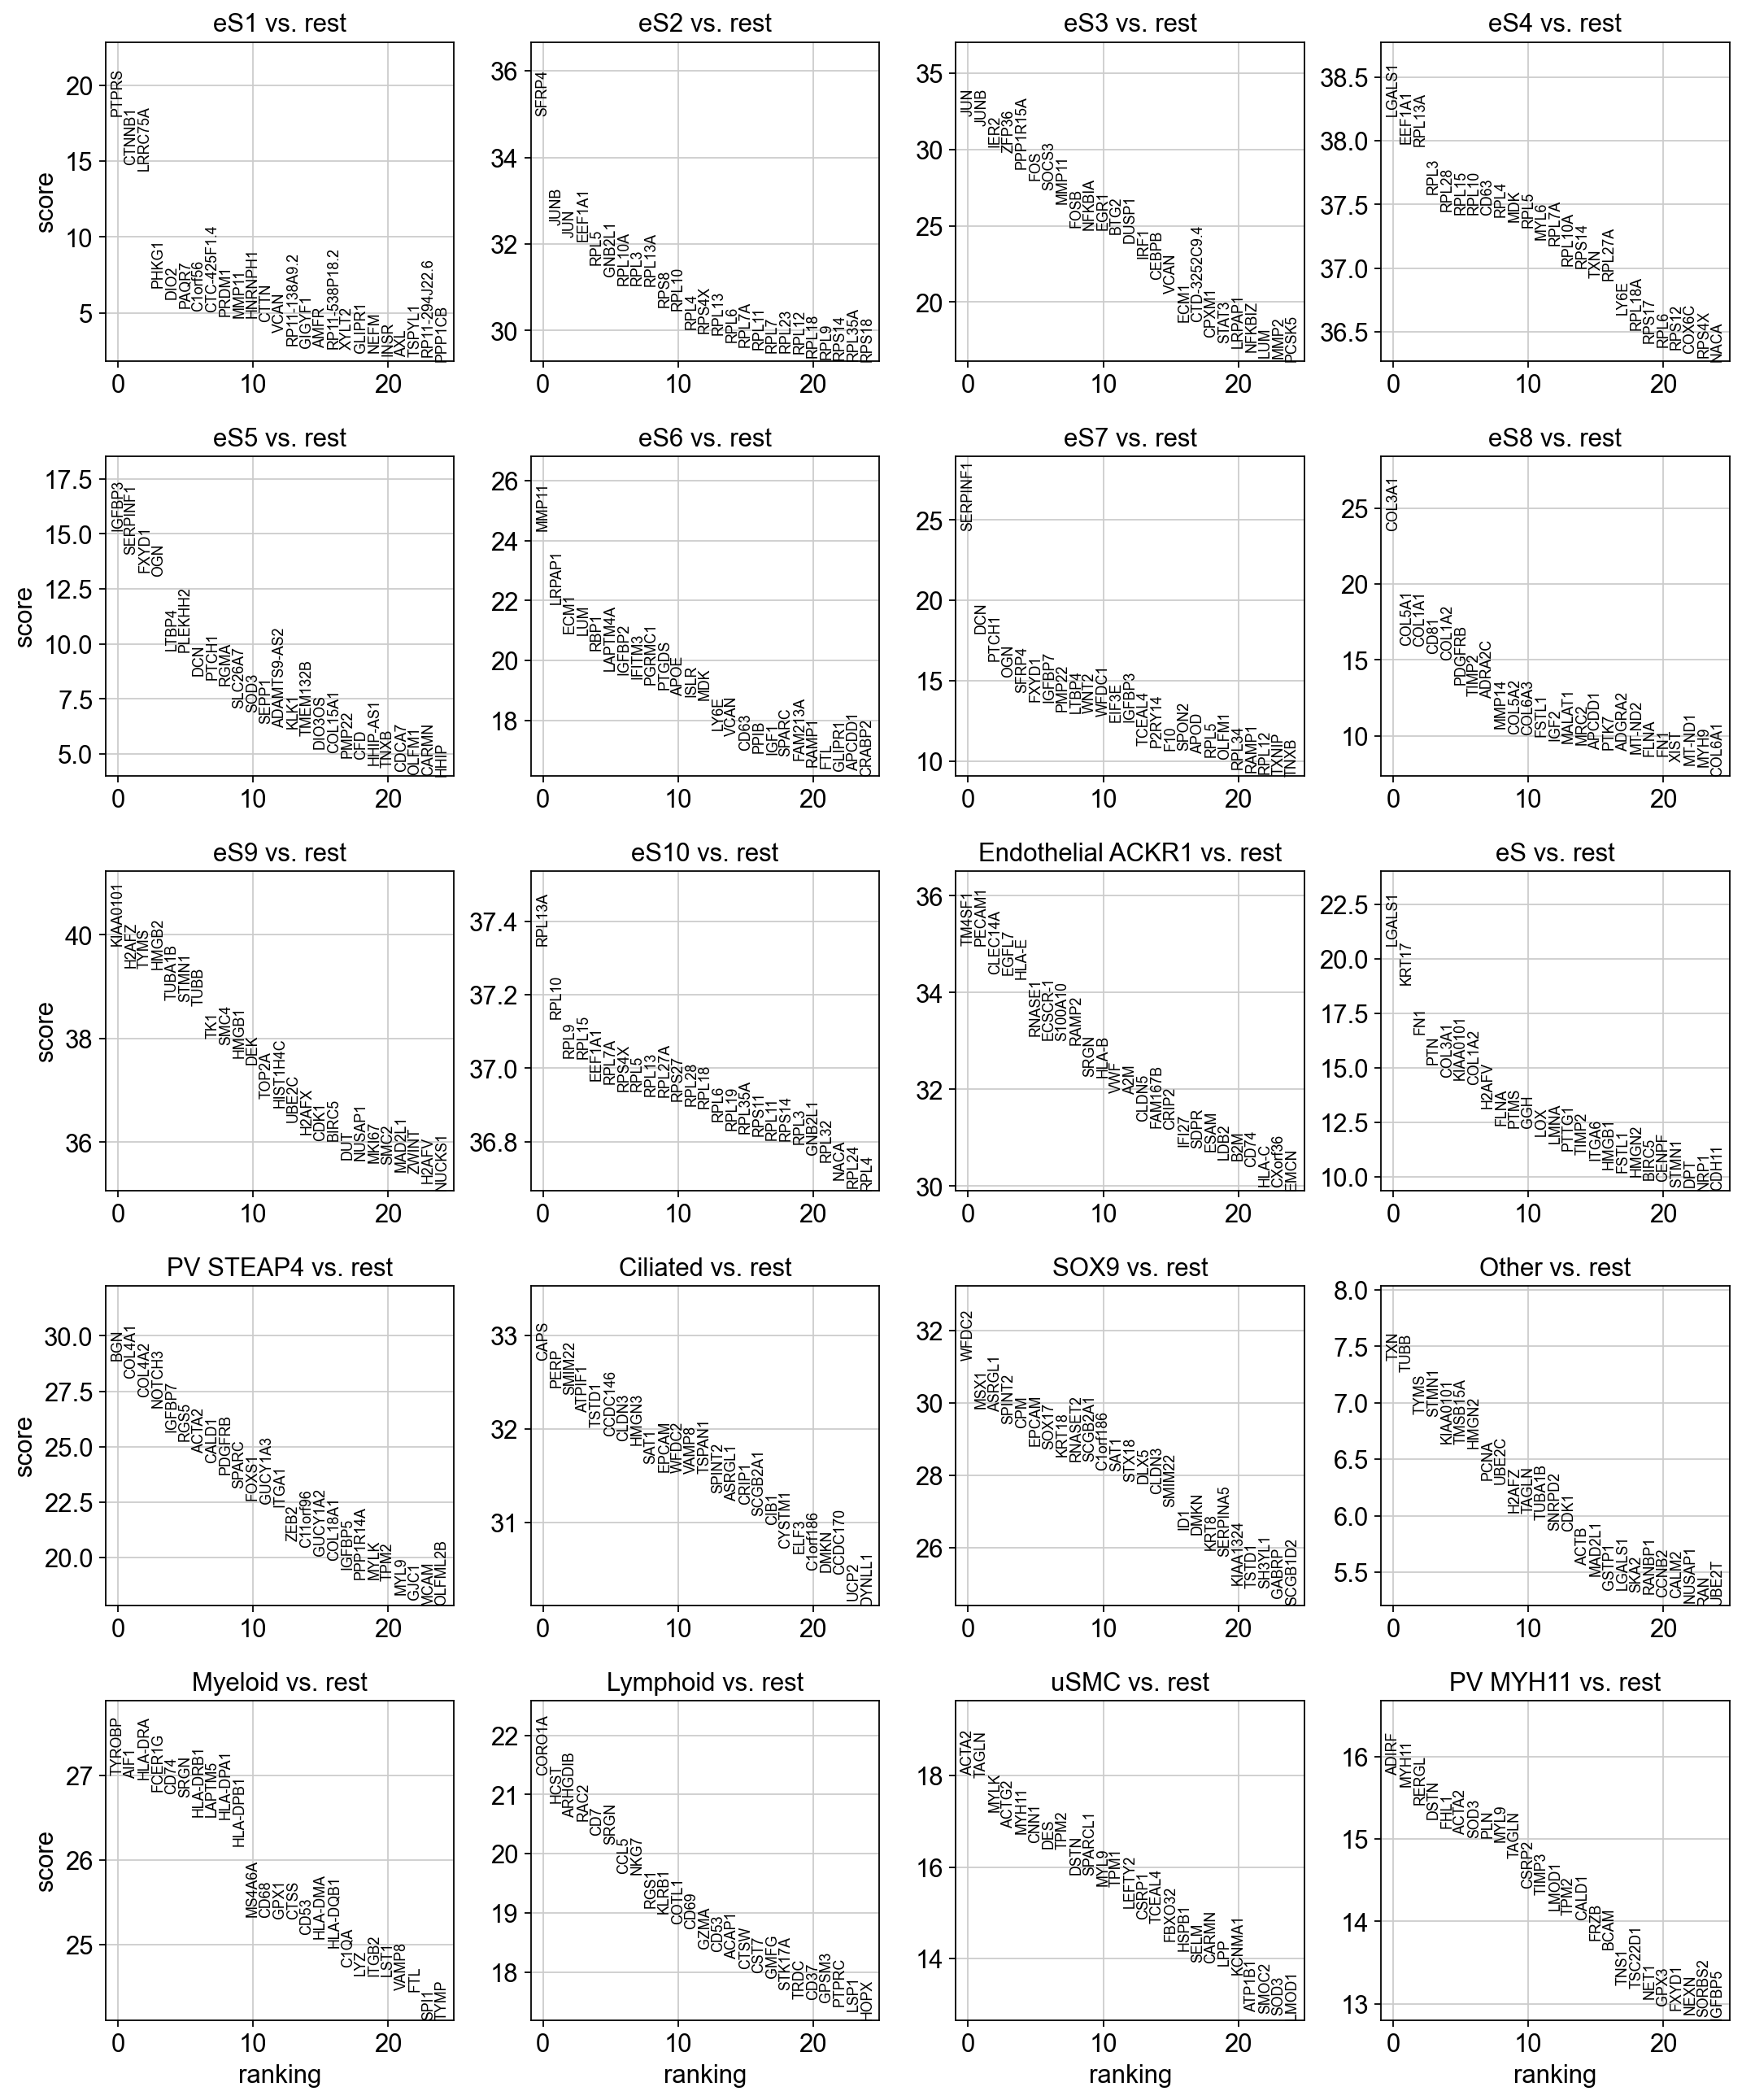

ranking genes


C:\Users\Schlumi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:03:38)


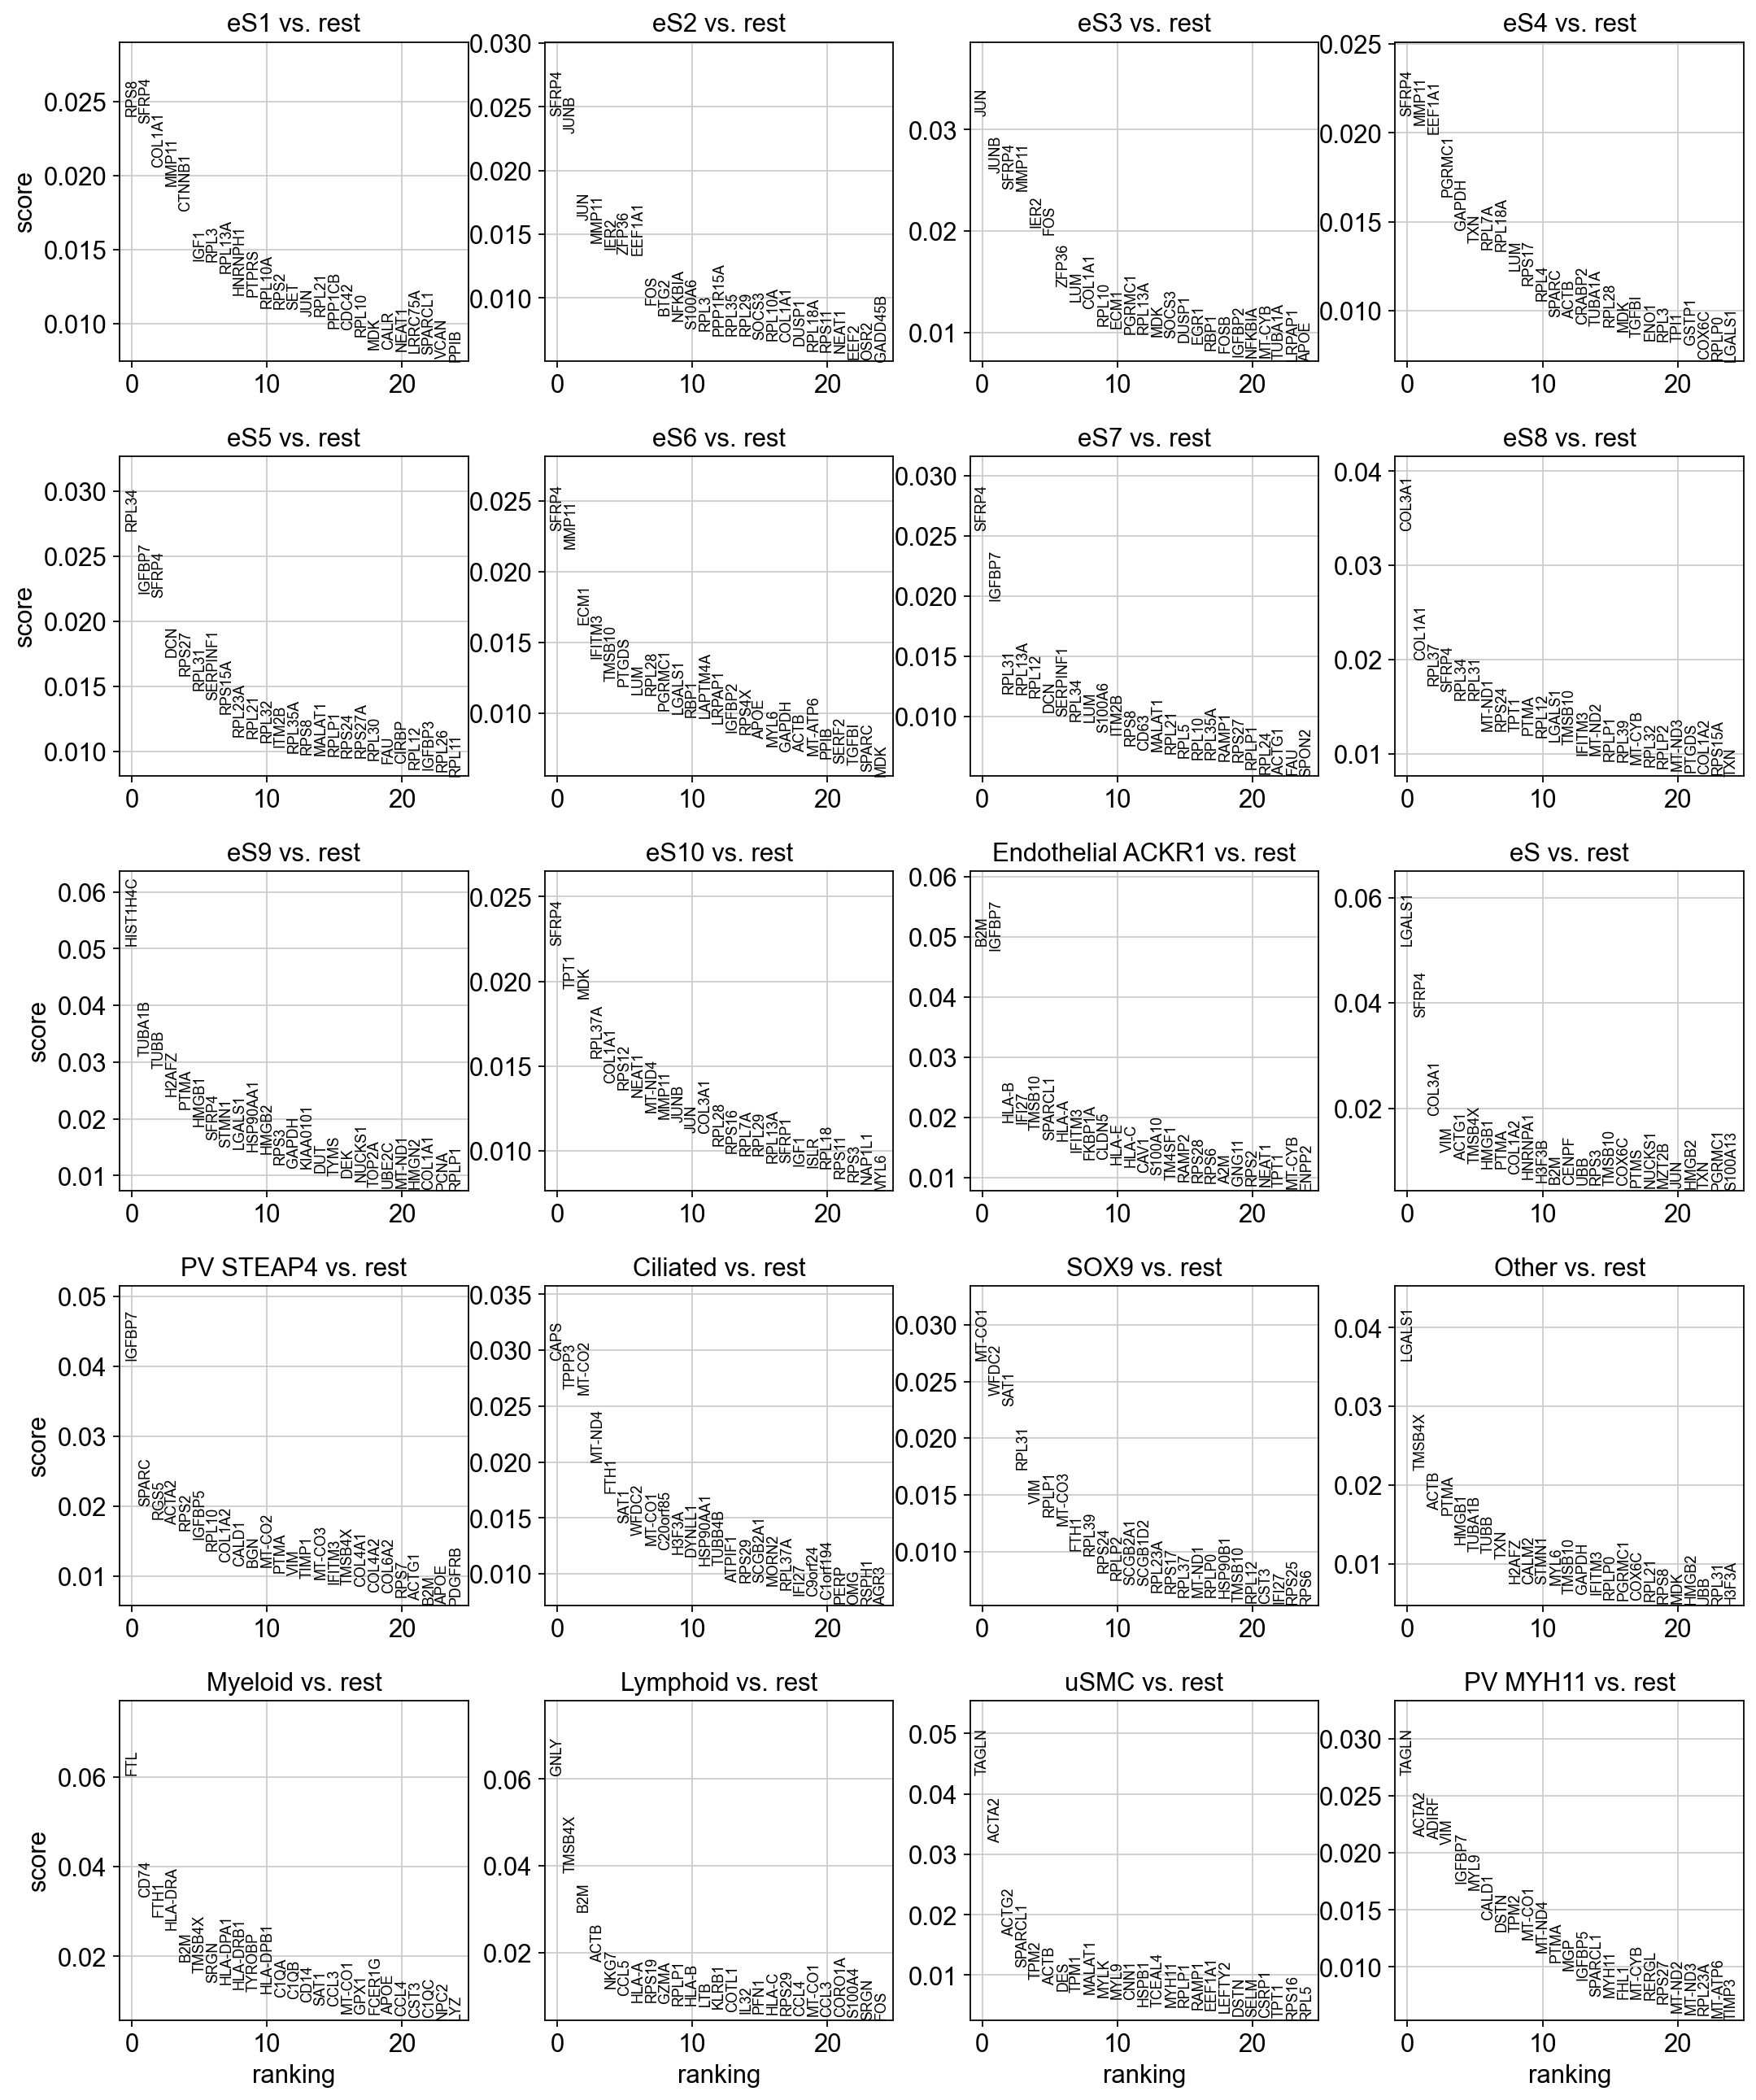

In [18]:
    #t-test: compute a ranking for the highly differential genes in each cluster:

sc.tl.rank_genes_groups(adata_ti_merged_12, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_ti_merged_12, n_genes=25, sharey=False) #ln34

sc.settings.verbosity = 2  # reduce the verbosity #ln35

    #result of a Wilcoxon rank-sum test:

sc.tl.rank_genes_groups(adata_ti_merged_12, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_merged_12, n_genes=25, sharey=False) #ln36

    #rank genes using logistic regression:

sc.tl.rank_genes_groups(adata_ti_merged_12, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_ti_merged_12, n_genes=25, sharey=False) #ln38

In [ ]:
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
#                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
#                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP'] #ln39
#
#genes_list = ['NCR3', 'MMP1', 'MMP3', 'MMP10', 'Wnt5', 'Wnt7a', 'MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 
#              'Hoxb7', 'sFRP', 'MMP11', 'tPA', 'PLAT', 'ADAM12', 'IGF', 'TGF', 'FGF1', 'HGF', 'FGFR3']
#
#top_20_Organoid_Control = ['FTH1', 'MALAT1', 'EEF1A1', 'MT-CO3', 'TPT1', 'MT-CO1', 'RPS2', 'TMSB4X', 'MT-CO2', 
#          'RPL10', 'MT-ATP6', 'MMP7', 'RPL13', 'PTMA', 'MT-CYB', 'ACTG1', 'RPL3', 'RPLP1', 
#          'RPS12', 'RPS18']
#
#genes_epi = ['PLAU', 'MMP7', 'THBS1', 'CADM1', 'NPAS3', 'ATP1A1', 'ANK3', 'ALPL', 'TRAK1', 
#         'SCGB1D2', 'MT1F', 'MT1X', 'MT1E', 'MT1G', 'CXCL14', 'MAOA', 'DPP4', 'NUPR1', 'GPX3'
#        'PAEP']
#
#genes_str = ['STC1', 'NFATC2', 'BMP2', 'PMAIP1', 'MMP11', 'SFRP1', 'WNT5A', 'ZFYVE21', 'CILP', 
#             'SLF2', 'MATN2', 'S100A4', 'DKK1', 'CRYAB', 'FOXO1', 'IL15', 'FGF7', 'LMCD1']
#
#genes_early = ['MMP26', 'TFF3', 'Hoxa10', 'Hoxa11', 'Conenxin-37', 'Hoxb7', 'sFRP', 'WIF', 'TGFB2', 'CCL18', 'PGR', 'ESR1'] 
#
#genes_late = ['SOX4', 'ADAMTS5', 'GNG4', 'Integrina2', 'EBAF', 'MMP7', 'proMMP3', 'EDNRB', 'MMP10', 'MMP', 'PLAU', 'PLAT', 
#              'ADAM', 'PAEP', 'CIQTNF6'] 
#
#important_genes = []

In [ ]:
    #reload the object that has been saved with the Wilcoxon Rank-Sum test result:

#adata = sc.read(results_file) #ln40

In [19]:
adata_ti_merged_12.obs

SampleID  log2p1_count  percent_mito  \
4861STDY7387181_AAACCTGAGGCATGGT  4861STDY7387181     13.951467      0.057320   
4861STDY7387181_AAACCTGAGGGCACTA  4861STDY7387181     13.776227      0.043838   
4861STDY7387181_AAACCTGAGTGAAGTT  4861STDY7387181     12.894628      0.070791   
4861STDY7387181_AAACCTGAGTGGGCTA  4861STDY7387181     12.329235      0.071137   
4861STDY7387181_AAACCTGCACCGAAAG  4861STDY7387181     12.171176      0.063977   
...                                           ...           ...           ...   
4861STDY7387182_TTTGTCACAGTATAAG  4861STDY7387182     14.018026      0.091506   
4861STDY7387182_TTTGTCAGTACGCACC  4861STDY7387182     13.354525      0.038384   
4861STDY7387182_TTTGTCAGTAGTAGTA  4861STDY7387182     14.928009      0.058386   
4861STDY7387182_TTTGTCAGTCGCATAT  4861STDY7387182     13.868436      0.051020   
4861STDY7387182_TTTGTCATCTGTGCAA  4861STDY7387182     14.754470      0.033793   

                                  n_genes DonorID   BiopsyType  \
4861STDY7387181_AAACCTGAGGCATGGT     3842     A13  Organ_Donor   
4861STDY7387181_AAACCTGAGGGCACTA     3544     A13  Organ_Donor   
4861STDY7387181_AAACCTGAGTGAAGTT     2507     A13  Organ_Donor   
4861STDY7387181_AAACCTGAGTGGGCTA     1928     A13  Organ_Donor   
4861STDY7387181_AAACCTGCACCGAAAG     1824     A13  Organ_Donor   
...                                   ...     ...          ...   
4861STDY7387182_TTTGTCACAGTATAAG     4265     A13  Organ_Donor   
4861STDY7387182_TTTGTCAGTACGCACC     2914     A13  Organ_Donor   
4861STDY7387182_TTTGTCAGTAGTAGTA     5654     A13  Organ_Donor   
4861STDY7387182_TTTGTCAGTCGCATAT     4020     A13  Organ_Donor   
4861STDY7387182_TTTGTCATCTGTGCAA     5056     A13  Organ_Donor   

                                              Location   Binary Stage  \
4861STDY7387181_AAACCTGAGGCATGGT  endometrium_enriched  Proliferative   
4861STDY7387181_AAACCTGAGGGCACTA  endometrium_enriched  Proliferative   
4861STDY7387181_AAACCTGAGTGAAGTT  endometrium_enriched  Proliferative   
4861STDY7387181_AAACCTGAGTGGGCTA  endometrium_enriched  Proliferative   
4861STDY7387181_AAACCTGCACCGAAAG  endometrium_enriched  Proliferative   
...                                                ...            ...   
4861STDY7387182_TTTGTCACAGTATAAG  endometrium_enriched  Proliferative   
4861STDY7387182_TTTGTCAGTACGCACC  endometrium_enriched  Proliferative   
4861STDY7387182_TTTGTCAGTAGTAGTA  endometrium_enriched  Proliferative   
4861STDY7387182_TTTGTCAGTCGCATAT  endometrium_enriched  Proliferative   
4861STDY7387182_TTTGTCATCTGTGCAA  endometrium_enriched  Proliferative   

                                          Stage Broad cell type  Cell type  \
4861STDY7387181_AAACCTGAGGCATGGT  proliferative         Stromal         eS   
4861STDY7387181_AAACCTGAGGGCACTA  proliferative         Stromal         eS   
4861STDY7387181_AAACCTGAGTGAAGTT  proliferative      Supporting  PV STEAP4   
4861STDY7387181_AAACCTGAGTGGGCTA  proliferative         Stromal         dS   
4861STDY7387181_AAACCTGCACCGAAAG  proliferative         Stromal         eS   
...                                         ...             ...        ...   
4861STDY7387182_TTTGTCACAGTATAAG  proliferative      Epithelial       SOX9   
4861STDY7387182_TTTGTCAGTACGCACC  proliferative         Stromal         eS   
4861STDY7387182_TTTGTCAGTAGTAGTA  proliferative      Epithelial       SOX9   
4861STDY7387182_TTTGTCAGTCGCATAT  proliferative         Stromal         eS   
4861STDY7387182_TTTGTCATCTGTGCAA  proliferative         Stromal         eS   

                                 CellCycle Phase     leiden  
4861STDY7387181_AAACCTGAGGCATGGT               S        eS4  
4861STDY7387181_AAACCTGAGGGCACTA              G1        eS4  
4861STDY7387181_AAACCTGAGTGAAGTT              G1  PV STEAP4  
4861STDY7387181_AAACCTGAGTGGGCTA              G1        eS1  
4861STDY7387181_AAACCTGCACCGAAAG              G1        eS1  
...                                          ...        ...  
4861STDY7387182_TTTGTCACAGT

In [45]:
    #show the 10 top ranked genes per cluster in a dataframe:

pd.DataFrame(adata_ti_merged_12.uns['rank_genes_groups']['names']).head(10) #ln41

0       1       2       3         4       5         6       7  \
0     RPS8   SFRP4     JUN   SFRP4     RPL34   SFRP4     SFRP4  COL3A1   
1    SFRP4    JUNB    JUNB   MMP11    IGFBP7   MMP11    IGFBP7  COL1A1   
2   COL1A1     JUN   SFRP4  EEF1A1     SFRP4    ECM1     RPL31   RPL37   
3    MMP11   MMP11   MMP11  PGRMC1       DCN  IFITM3    RPL13A   SFRP4   
4   CTNNB1    IER2    IER2   GAPDH     RPS27  TMSB10     RPL12   RPL34   
5     IGF1   ZFP36     FOS     TXN     RPL31   PTGDS       DCN   RPL31   
6     RPL3  EEF1A1   ZFP36   RPL7A  SERPINF1     LUM  SERPINF1  MT-ND1   
7   RPL13A     FOS     LUM  RPL18A    RPS15A   RPL28     RPL34   RPS24   
8  HNRNPH1    BTG2  COL1A1     LUM    RPL23A  PGRMC1       LUM    TPT1   
9    PTPRS  NFKBIA   RPL10   RPS17     RPL21  LGALS1    S100A6    PTMA   

          8       9       10       11      12        13      14      15  \
0  HIST1H4C   SFRP4      B2M   LGALS1  IGFBP7      CAPS  MT-CO1  LGALS1   
1    TUBA1B    TPT1   IGFBP7    SFRP4   SPARC     TPPP3   WFDC2  TMSB4X   
2      TUBB     MDK    HLA-B   COL3A1    RGS5    MT-CO2    SAT1    ACTB   
3     H2AFZ  RPL37A    IFI27      VIM   ACTA2    MT-ND4   RPL31    PTMA   
4      PTMA  COL1A1   TMSB10    ACTG1    RPS2      FTH1     VIM   HMGB1   
5     HMGB1   RPS12  SPARCL1   TMSB4X  IGFBP5      SAT1   RPLP1  TUBA1B   
6     SFRP4   NEAT1    HLA-A    HMGB1   RPL10     WFDC2  MT-CO3    TUBB   
7     STMN1  MT-ND4   IFITM3     PTMA  COL1A2    MT-CO1    FTH1     TXN   
8    LGALS1   MMP11   FKBP1A   COL1A2   CALD1  C20orf85   RPL39   H2AFZ   
9  HSP90AA1    JUNB    CLDN5  HNRNPA1     BGN     H3F3A   RPS24   CALM2   

         16      17       18      19  
0       FTL    GNLY    TAGLN   TAGLN  
1      CD74  TMSB4X    ACTA2   ACTA2  
2      FTH1     B2M    ACTG2   ADIRF  
3   HLA-DRA    ACTB  SPARCL1     VIM  
4       B2M    NKG7     TPM2  IGFBP7  
5    TMSB4X    CCL5     ACTB    MYL9  
6      SRGN   HLA-A      DES   CALD1  
7  HLA-DPA1   RPS19     TPM1    DSTN  
8  HLA-DRB1    GZMA   MALAT1    TPM2  
9    TYROBP   RPLP1     MYLK  MT-CO1

In [60]:
    #Get a table with the scores and groups:

result = adata_ti_merged_12.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5) #ln42

0_n           0_p
0    PTPRS  1.215892e-38
1  LRRC75A  2.699427e-30
2   CTNNB1  2.084784e-26
3    PHKG1  5.329512e-09
4     DIO2  8.557696e-06

ranking genes
    finished (0:00:07)


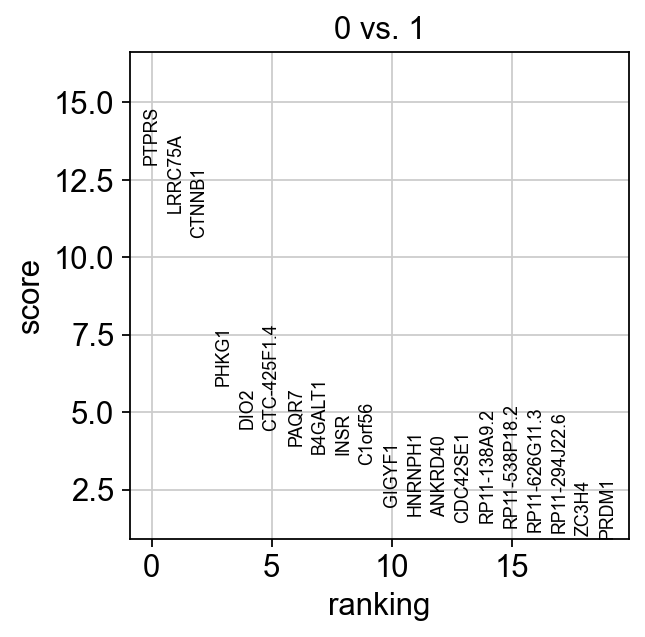

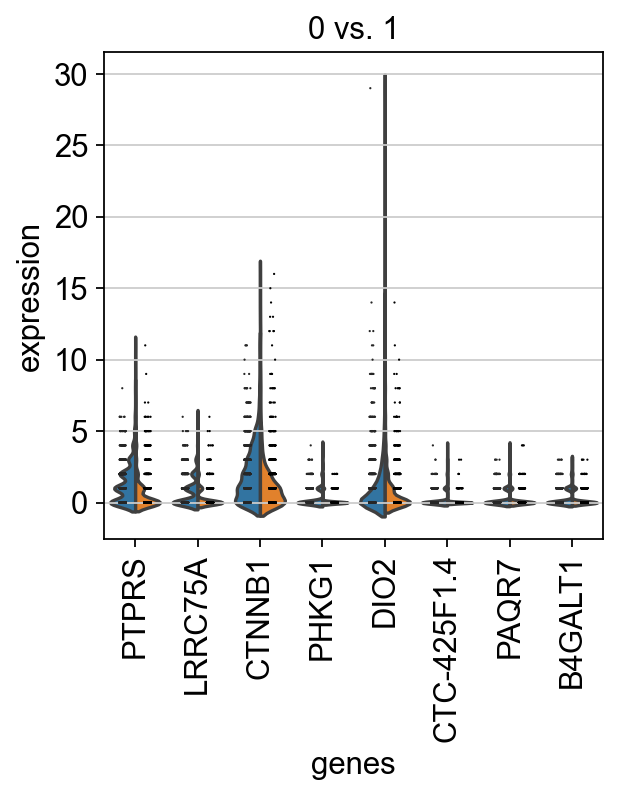

In [48]:
    #Compare to a single cluster:

sc.tl.rank_genes_groups(adata_ti_merged_12, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_ti_merged_12, groups=['0'], n_genes=20) #ln43

    #more detailed view for a certain group:
sc.pl.rank_genes_groups_violin(adata_ti_merged_12, groups='0', n_genes=8)

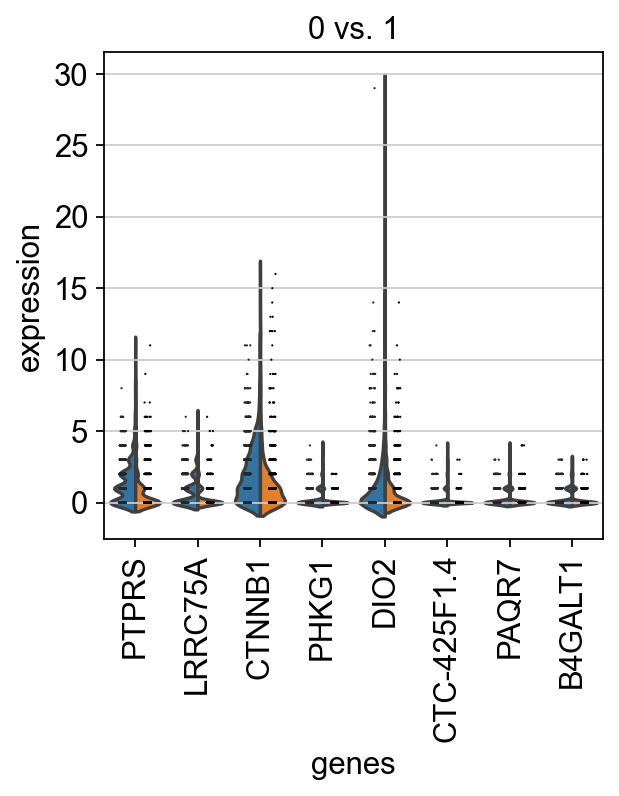

In [49]:
    #reload the objects with the computed differential expression:
#adata = sc.read(results_file)
sc.pl.rank_genes_groups_violin(adata_ti_merged_12, groups='0', n_genes=8)

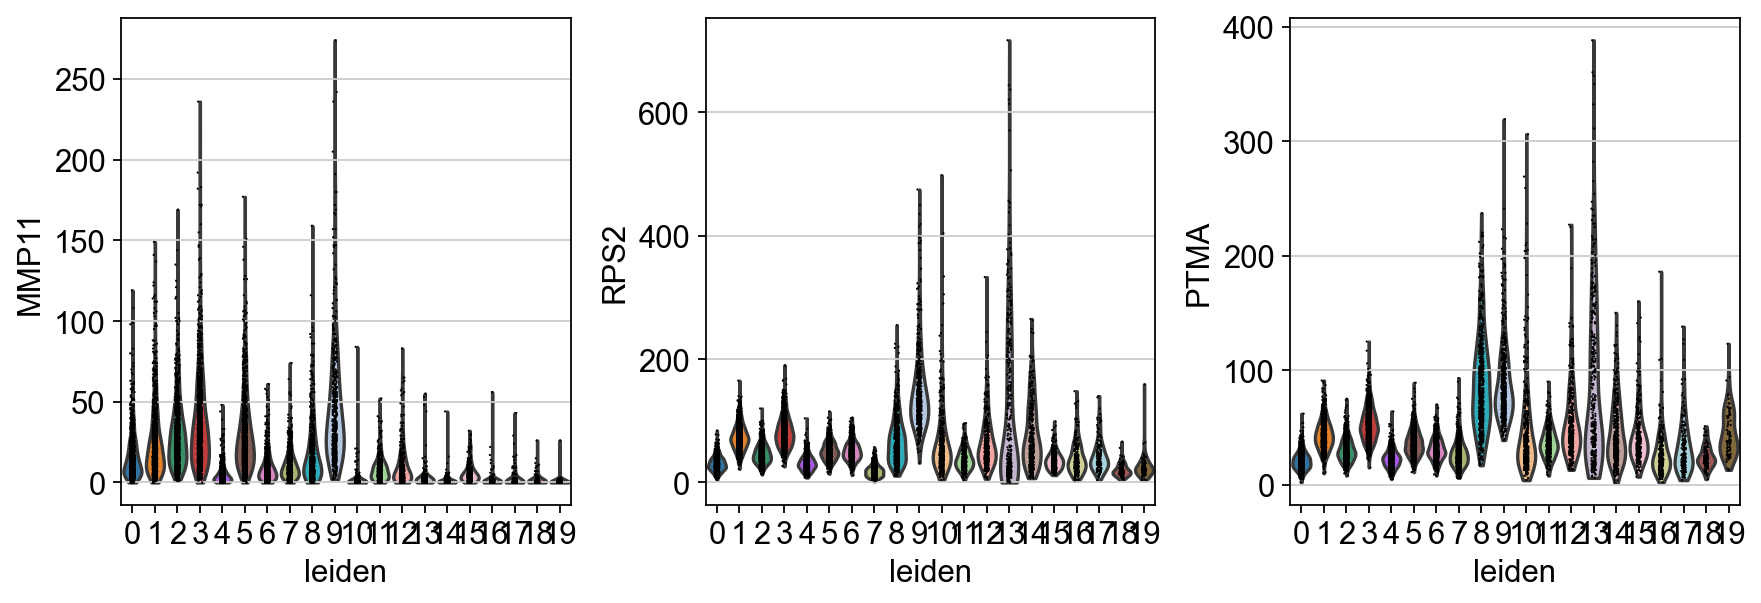

In [52]:
    #If we want to compare a certain gene across groups:
sc.pl.violin(adata_ti_merged_12, ['MMP11', 'RPS2', 'PTMA'], groupby='leiden')

In [ ]:
    #actually mark/annotate the cell types:
new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
adata.rename_categories('leiden', new_cluster_names)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')

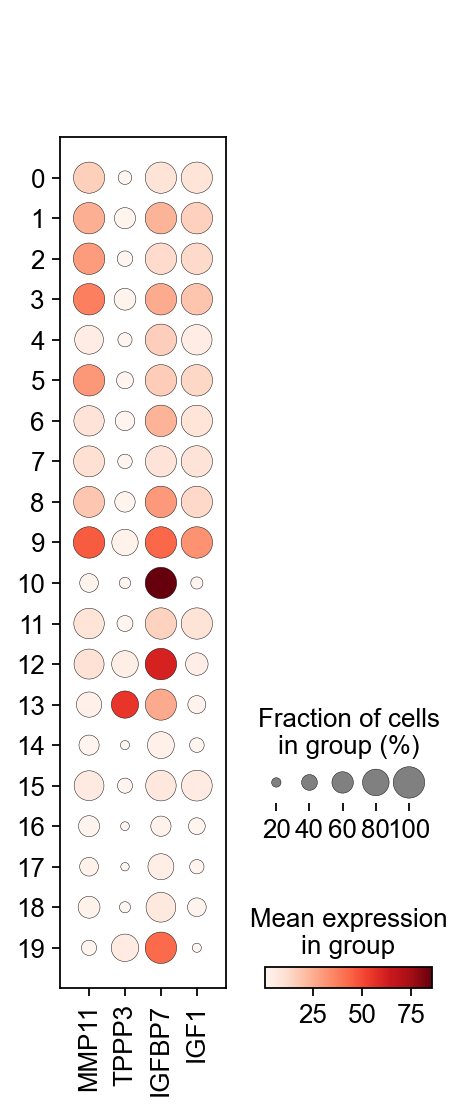

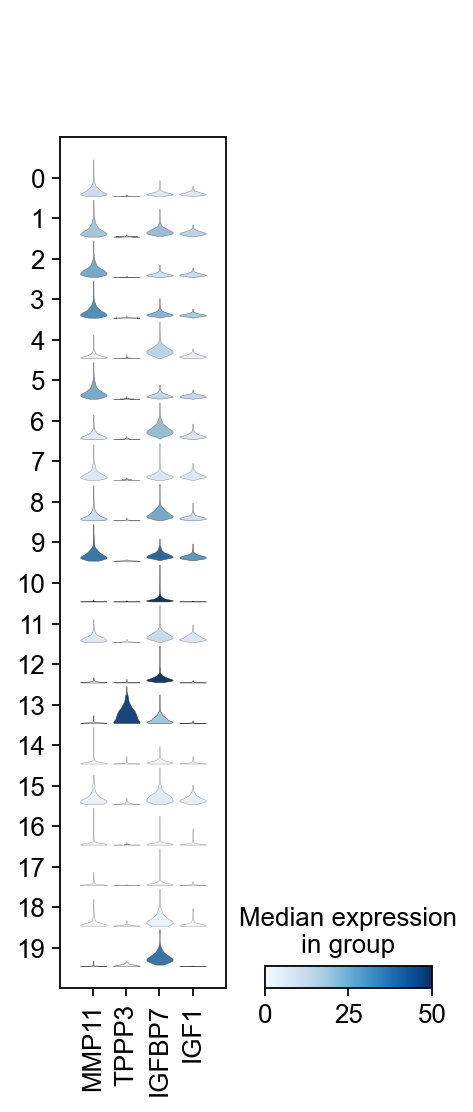

In [57]:
    #visualize the marker genes:
sc.pl.dotplot(adata_ti_merged_12, markers, groupby='leiden');

sc.pl.stacked_violin(adata_ti_merged_12, markers, groupby='leiden', rotation=90);

## dotplot

In [ ]:
    #quick way to check the expression of genes

sc.pl.dotplot(adata, marker_genes, 'clusters', dendrogram=True)

## matrixplot

In [ ]:
sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True, cmap='Blues', standard_scale='var', colorbar_title='column scaled\nexpression')

# scale and store results in layer
pbmc.layers['scaled'] = sc.pp.scale(pbmc, copy=True).X

sc.pl.matrixplot(adata, marker_genes, 'clusters', dendrogram=True,
                 colorbar_title='mean z-score', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r')

## Heatmaps

In [ ]:
ax = sc.pl.heatmap(adata, marker_genes, groupby='clusters', cmap='viridis', dendrogram=True, swap_axes=True)

sc.pl.rank_genes_groups_heatmap(pbmc, n_genes=3, use_raw=False, swap_axes=True, vmin=-3, vmax=3, cmap='bwr', layer='scaled', figsize=(10,7), show=False);